# Geopandas Playground
Playing around in Geopandas to test its suitability for the research project

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

%matplotlib inline

Attempting to read the geodatabase from [CALFIRE](https://www.fire.ca.gov/what-we-do/fire-resource-assessment-program/fire-perimeters)

In [2]:
calfires = gpd.read_file("fire21_2.gdb")

In [3]:
# seeing what it looks like
calfires.head()

,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,Shape_Length,Shape_Area,COMPLEX_NAME,COMPLEX_INCNUM,geometry
0,2020,CA,CDF,NEU,NELSON,00013212,2020-06-18T00:00:00+00:00,2020-06-23T00:00:00+00:00,11.0,,110.0,109.602280,1.0,1.0,NaN,3252.523280,4.435447e+05,NaN,NaN,"MULTIPOLYGON (((-116841.251 97942.565, -116836..."
1,2020,CA,CDF,NEU,AMORUSO,00011799,2020-06-01T00:00:00+00:00,2020-06-04T00:00:00+00:00,2.0,,670.0,685.585022,1.0,1.0,NaN,9653.760308,2.774464e+06,NaN,NaN,"MULTIPOLYGON (((-117328.400 90212.407, -117321..."
2,2020,CA,CDF,NEU,ATHENS,00018493,2020-08-10T00:00:00+00:00,2020-03-01T00:00:00+00:00,14.0,,26.0,27.300480,1.0,1.0,NaN,1649.643235,1.104811e+05,NaN,NaN,"MULTIPOLYGON (((-115605.059 92988.787, -115585..."
3,2020,CA,CDF,NEU,FLEMING,00007619,2020-03-31T00:00:00+00:00,2020-04-01T00:00:00+00:00,9.0,,13.0,12.931545,1.0,1.0,NaN,1577.155857,5.233211e+04,NaN,NaN,"MULTIPOLYGON (((-110213.270 105975.579, -11020..."
4,2020,CA,CDF,NEU,MELANESE,00008471,2020-04-14T00:00:00+00:00,2020-04-19T00:00:00+00:00,18.0,,10.3,10.315964,1.0,1.0,NaN,1035.787625,4.174722e+04,NaN,NaN,"MULTIPOLYGON (((-111793.600 164243.615, -11177..."


In [4]:
print(calfires[["YEAR_"]])

      YEAR_
0      2020
1      2020
2      2020
3      2020
4      2020
...     ...
21683  2008
21684  2008
21685  2008
21686  2008
21687  2021

[21688 rows x 1 columns]


<Axes: >

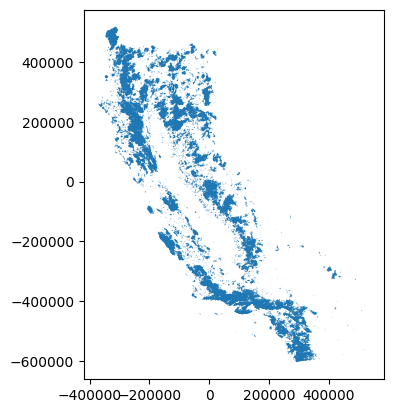

In [5]:
calfires.plot()

Trying to find the lowest year because for some reason all of the years are STRINGS????

In [21]:
lowest_year = 2023
for i in calfires.YEAR_:
    try:
        if int(i) < lowest_year:
            lowest_year = int(i)
    except:
        print("no year, just ")
        print(i)

print(lowest_year)

no year, just 

no year, just 

no year, just 

no year, just 

no year, just 

no year, just 

no year, just 

no year, just 

no year, just 

no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
no year, just 
nan
n

Finding how many fires are from each year

In [28]:
no_year = open("no_years.txt", "w")
write_to = ""
year_count = {}
year_dist = open("year_dist.csv", "w")

for i in calfires.index:
    year = 0
    try:
        year = int(calfires["YEAR_"][i])
    except:
        write_to += str(i)
        write_to += "\n"

    if year not in year_count.keys():
        year_count[year] = 1
    else:
        year_count[year] += 1

no_year.write(write_to)
print(year_count)

year_dist_str = ""
for i in year_count.keys():
    year_dist_str += str(i)
    year_dist_str += ", "
    year_dist_str += str(year_count[i])
    year_dist_str += "\n"

year_dist.write(year_dist_str)

{2020: 502, 2007: 348, 2006: 316, 2005: 306, 2004: 277, 1944: 137, 1915: 132, 1917: 266, 1960: 142, 1921: 160, 1923: 125, 1970: 233, 1920: 131, 1979: 366, 1990: 175, 1998: 163, 1966: 133, 1942: 101, 1941: 112, 1982: 145, 1973: 151, 1977: 167, 1953: 217, 1946: 102, 1955: 172, 1931: 167, 1949: 172, 1964: 138, 1948: 66, 1958: 167, 1972: 154, 1916: 131, 1974: 206, 1950: 227, 1930: 108, 1971: 109, 1924: 251, 1926: 190, 1927: 99, 1945: 149, 1952: 173, 1911: 166, 1929: 154, 0: 77, 1997: 187, 1984: 220, 1910: 90, 1951: 221, 1956: 133, 1981: 275, 1909: 24, 1935: 83, 1936: 123, 1961: 167, 1919: 165, 1925: 91, 1928: 168, 1918: 129, 1940: 89, 1933: 73, 1968: 213, 1999: 279, 1943: 115, 1914: 105, 1922: 116, 1975: 211, 1932: 116, 1912: 56, 1978: 152, 1983: 160, 1913: 84, 1947: 122, 1934: 133, 1937: 59, 1938: 100, 1967: 112, 1976: 134, 2000: 192, 1994: 217, 1954: 158, 1878: 1, 1895: 1, 1896: 1, 1898: 5, 1907: 10, 1908: 16, 1986: 172, 1980: 319, 1962: 109, 1959: 206, 1900: 12, 1957: 155, 2003: 341, 19

1213

Attempting to use sklearn's Support Vector Machine algorithm on the geodataframe

In [6]:
X = calfires[["YEAR_", "ALARM_DATE", "CAUSE", "REPORT_AC"]]
y = calfires[["geometry"]]

train_X, test_X = train_test_split(X, test_size=.1, random_state=1)
train_y, test_y = train_test_split(y, test_size=.1, random_state=1)

test_svr = svm.SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
test_svr.fit(X, y)

ValueError: could not convert string to float: ''